<a href="https://colab.research.google.com/github/girisairam450/Episodes/blob/master/NN_Car_MPG_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

    100% |████████████████████████████████| 345.2MB 57kB/s 


In [2]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [3]:
!pip install seaborn

In [0]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
dataset_path = keras.utils.get_file('auto-mpg.data','https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
dataset_path

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [6]:
column_names=['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset = pd.read_csv(dataset_path,names=column_names,na_values="?",comment = "\t",sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
origin = dataset.pop('Origin')

In [10]:
origin.tail()

393    1
394    2
395    1
396    1
397    1
Name: Origin, dtype: int64

In [11]:
dataset['USA']  = (origin ==1)*1.0
dataset['Europe']  = (origin ==2)*1.0
dataset['Japan']  = (origin ==3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
train_dataset =  dataset.sample(frac=0.8, random_state = 0)
test_dataset =  dataset.drop(train_dataset.index)

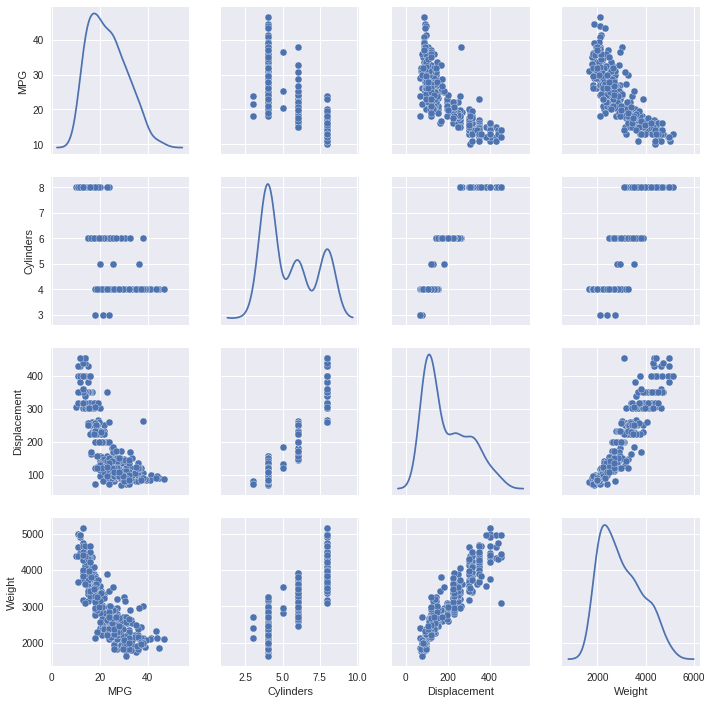

In [13]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind = 'kde')

In [14]:
train_stats = train_dataset.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [15]:
train_stats.pop('MPG')

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [16]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)

In [19]:
norm_train_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,-1.286751,2.143005,-0.495225


In [0]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation = tf.nn.relu, input_shape = [len(train_dataset.keys())]),
      layers.Dense(64, activation = tf.nn.relu),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model.compile(loss='mse',optimizer = optimizer, metrics = ['mae','mse'])
  return model

In [21]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [23]:
example_batch = norm_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.29466584],
       [ 0.04854687],
       [-0.7949922 ],
       [ 0.165948  ],
       [-0.10086205],
       [-0.11227779],
       [-0.08640521],
       [ 0.32374635],
       [-0.11851411],
       [-0.06508359]], dtype=float32)

In [25]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch %100 ==0: print('')
    print('.', end='')

EPOCHS =  1000
history =  model.fit(norm_train_data, train_labels, epochs = EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,1.837841,0.924616,1.837841,9.976789,2.390093,9.976789,995
996,1.888857,0.915545,1.888857,9.757524,2.365589,9.757524,996
997,1.976694,0.956284,1.976694,10.306950,2.430920,10.306951,997
998,1.867772,0.914800,1.867772,9.945269,2.385460,9.945269,998
999,1.860810,0.895597,1.860810,10.293789,2.460279,10.293788,999


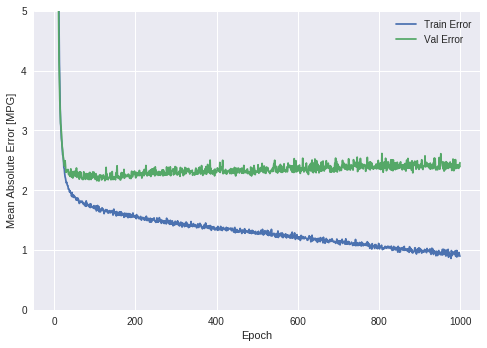

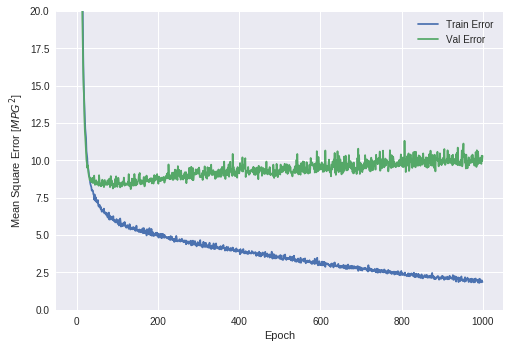

In [28]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error [MPG]')
  plt.plot(hist['epoch'],hist['mean_absolute_error'], label ='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_absolute_error'], label ='Val Error')
  plt.legend()
  plt.ylim([0,5])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'],hist['mean_squared_error'], label ='Train Error')
  plt.plot(hist['epoch'],hist['val_mean_squared_error'], label ='Val Error')
  plt.legend()
  plt.ylim([0,20])
  
  

plot_history(history)


.....................................................................

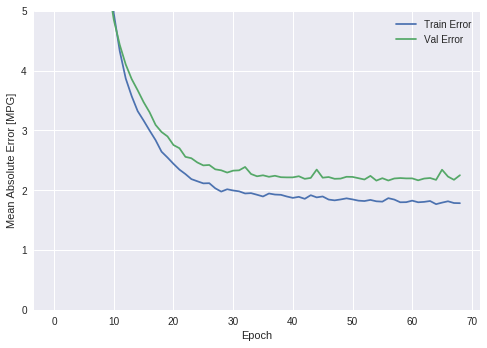

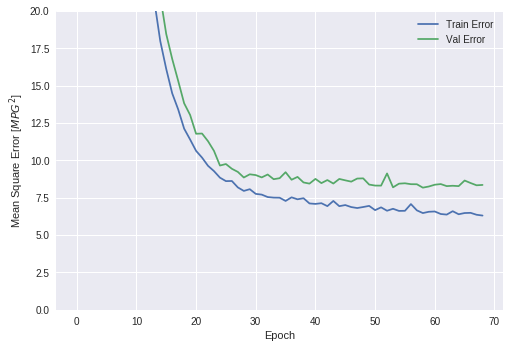

In [29]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(norm_train_data, train_labels, epochs = EPOCHS, validation_split =0.2, verbose=0, callbacks=[early_stop,PrintDot()])

plot_history(history)

In [30]:
loss, mae, mse = model.evaluate(norm_test_data, test_labels, verbose=0)

print('Testing Set Mean Abs Error:{:5.2f} MPG'.format(mae))

Testing Set Mean Abs Error: 1.80 MPG


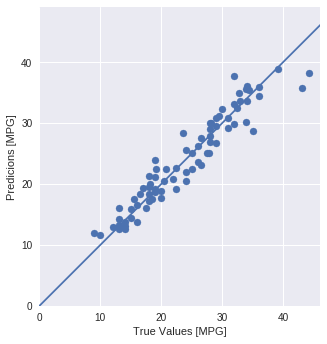

In [31]:
test_predictions = model.predict(norm_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predicions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])

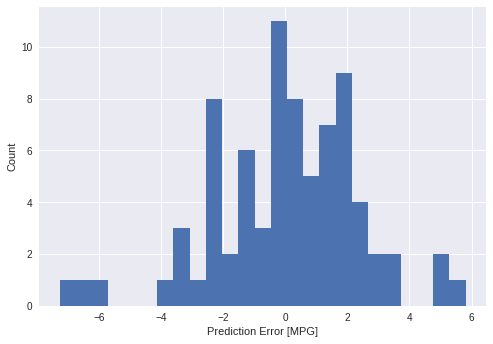

In [32]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_=plt.ylabel("Count")